<font color='red' size='5px'>PCA Theory<font/>


   - PCA:Principal Component Analysis (factor analysis) is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. Target: to find what features explain the most variance in your data
        -  Factor analysis determines the lowest number of orthogonal lines to project our data on 2D, or 3D  scale
    
        - Components : We linearly transform our data set such that the greatest variance of the data set comes to lie on the first axis, the second greatest variance lies on the second axis, and so on.( This process allows us to reduce the number of variables used to represent our data)

        - Scree plot: a graphical representation of variance that each PC component accounts for.
    

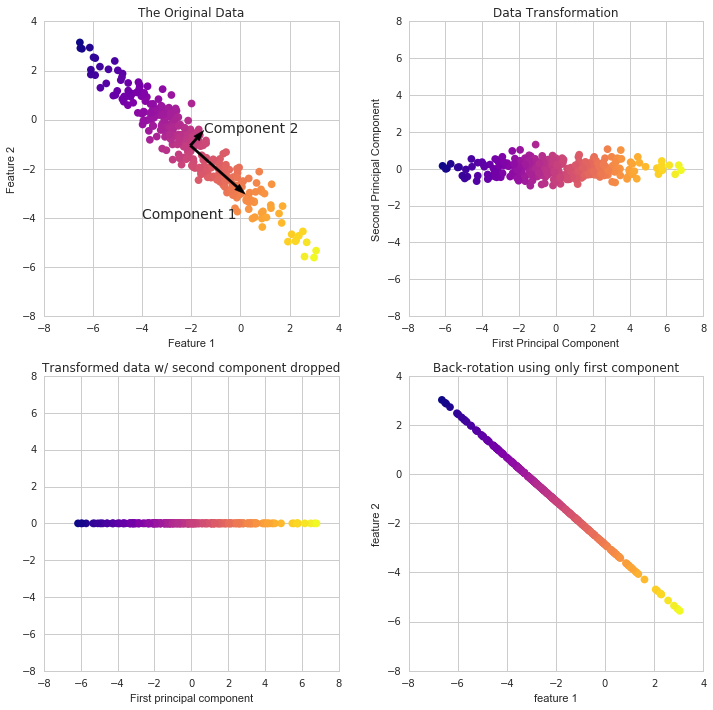

In [2]:
Image('PCAA.png')

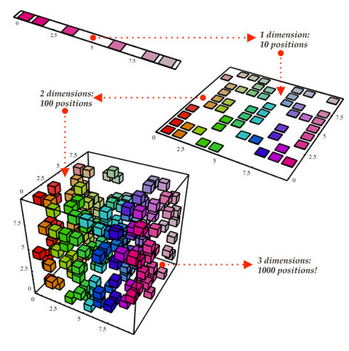

In [2]:
Image('PCA Demo.png')

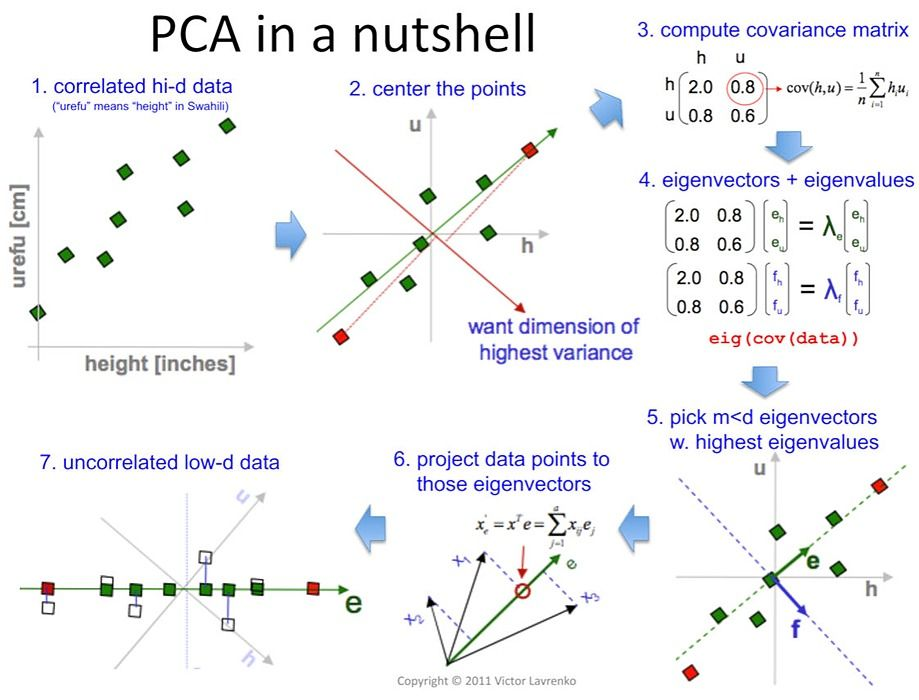

In [3]:
Image('PCA.jpg')

Compute center of data
shift data to orgin
Calculate eigen vector of the line that best fit your data
get the normal line to it
SVD is used to perform PCA

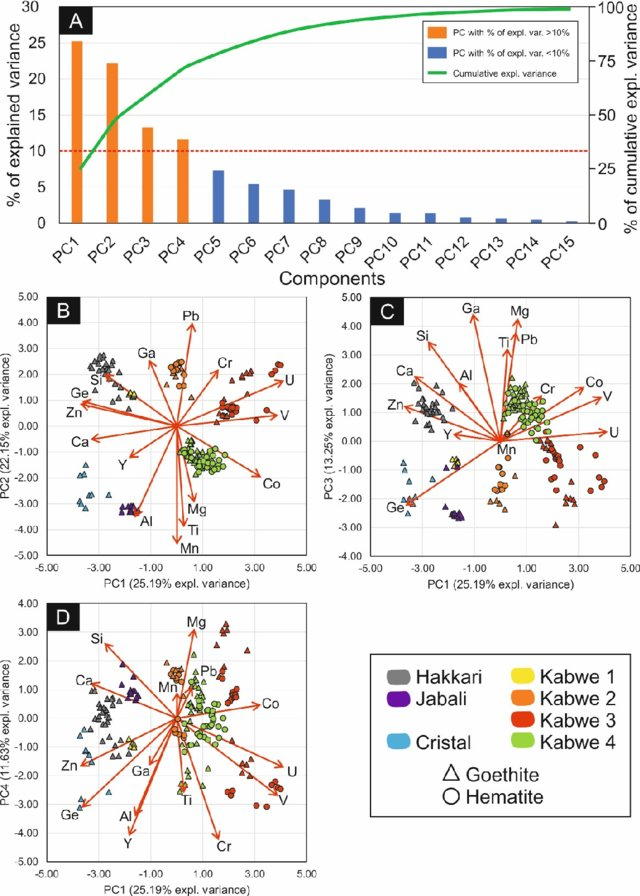

In [4]:
Image('Scree Plot.jpg')

<font color='Blue' size='5px'>Steps of PCA<font/>
    
   - First, we find the center of our data
   - Second, we begin to find the line that fit our data, and path through the orgin by minimizing the sum of squared distances of the projected points.
   - Third, we find the Eigenvector that represent the line ( 1st component)
   - Fourth, the second component will be perpendicular on the 1st, and path through the orgin.
   - Fifth, rotate PC1 & PC2 like x and y
   - Sixth, find the place of the new data
   
    

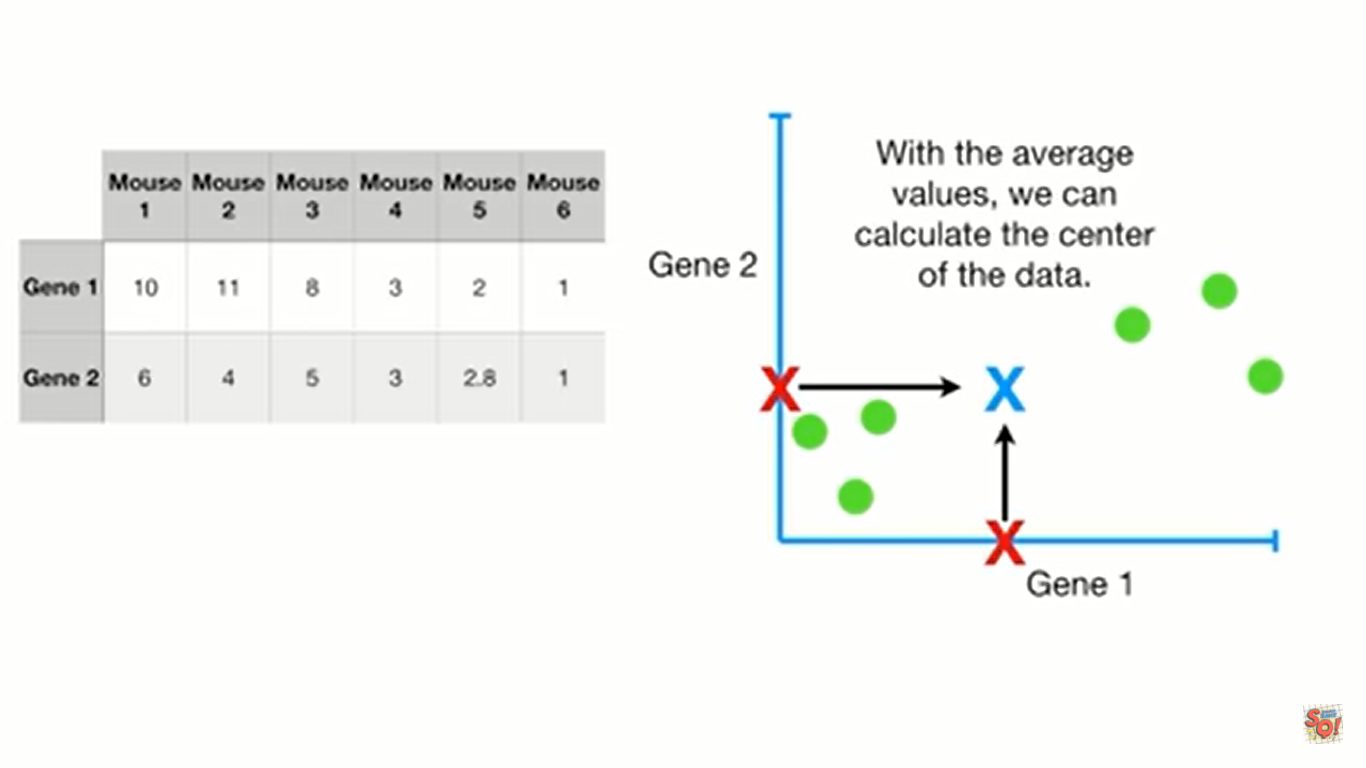

In [6]:
Image('Center of data.png')
    # Here it's a gene example of rate that has 2 main features

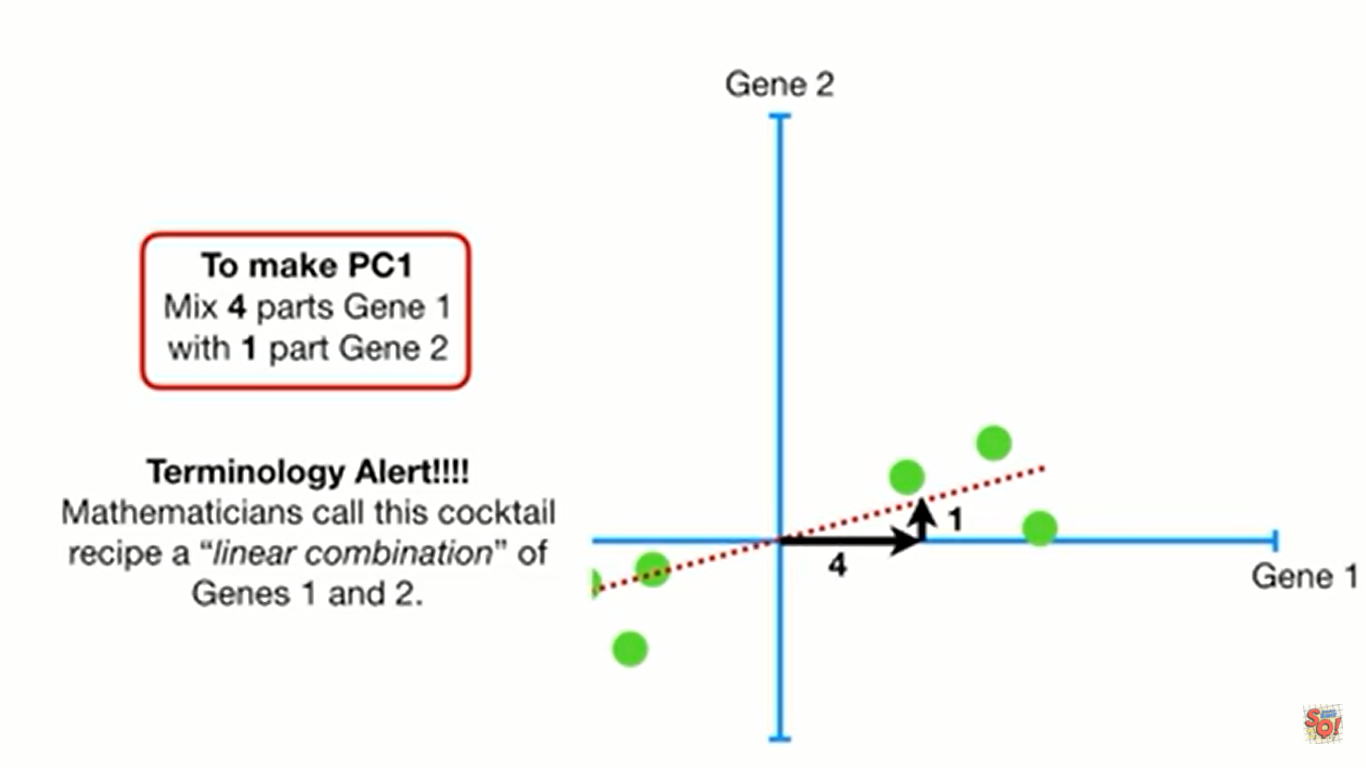

In [12]:
Image('coctail.png')
    # Here we can see that Gene1 is more effective on end result

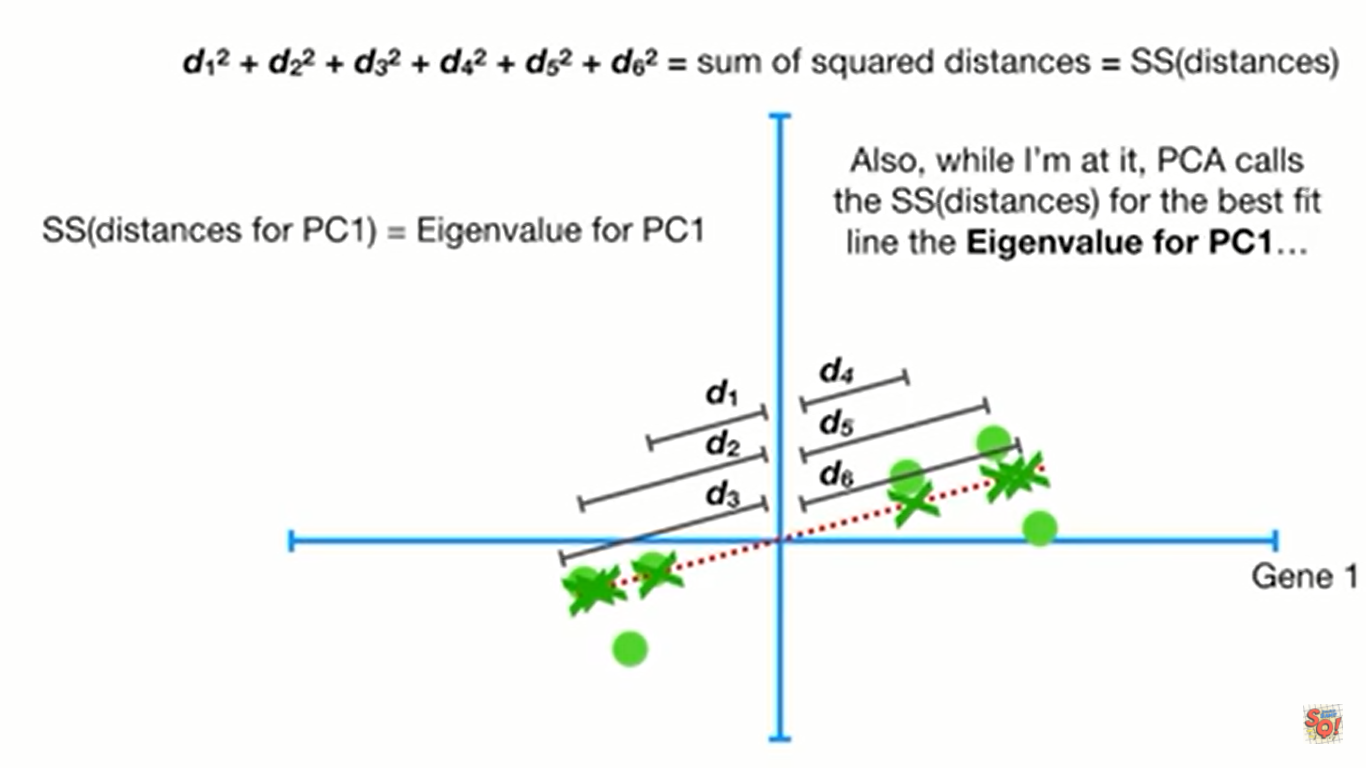

In [7]:
Image('SSD.png')
    # We will try to find the vector that represent PC1

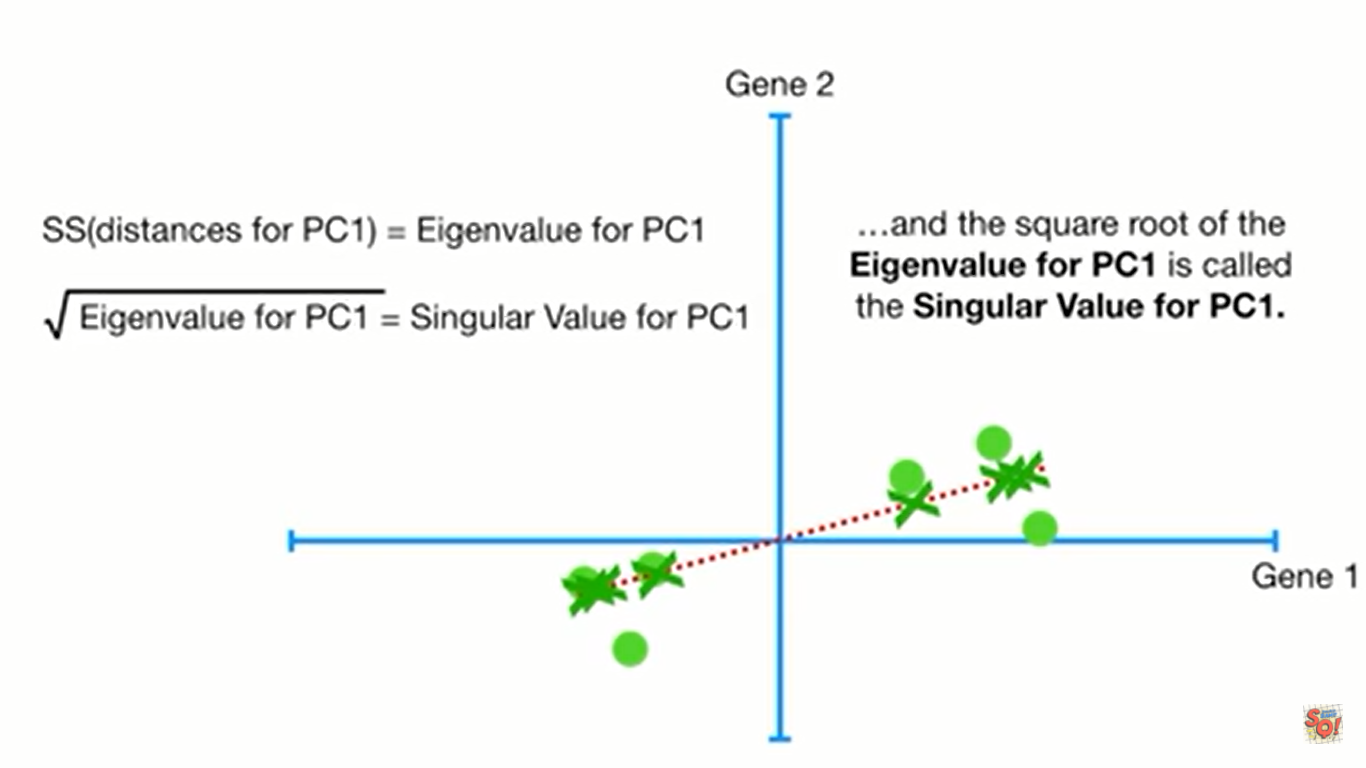

In [9]:
Image('PC1E.png')

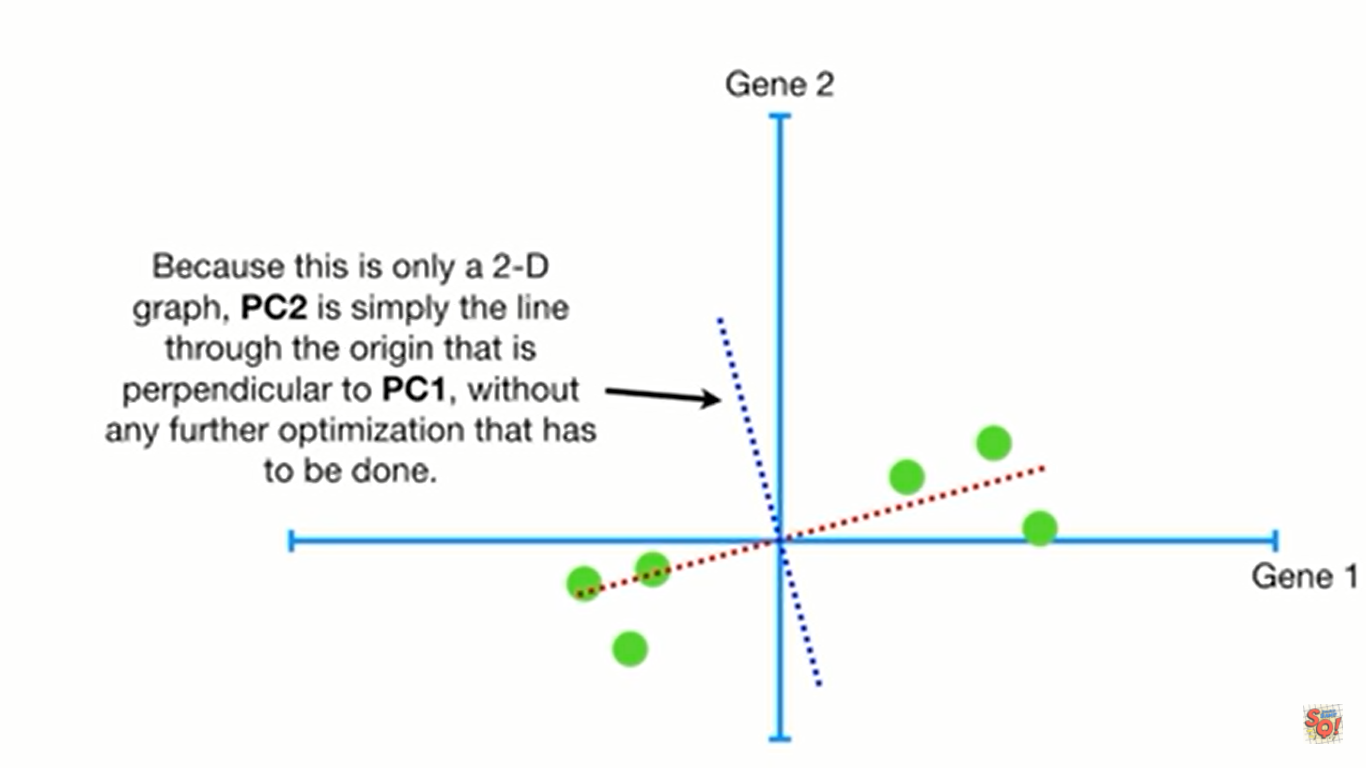

In [11]:
Image('PC2.png')

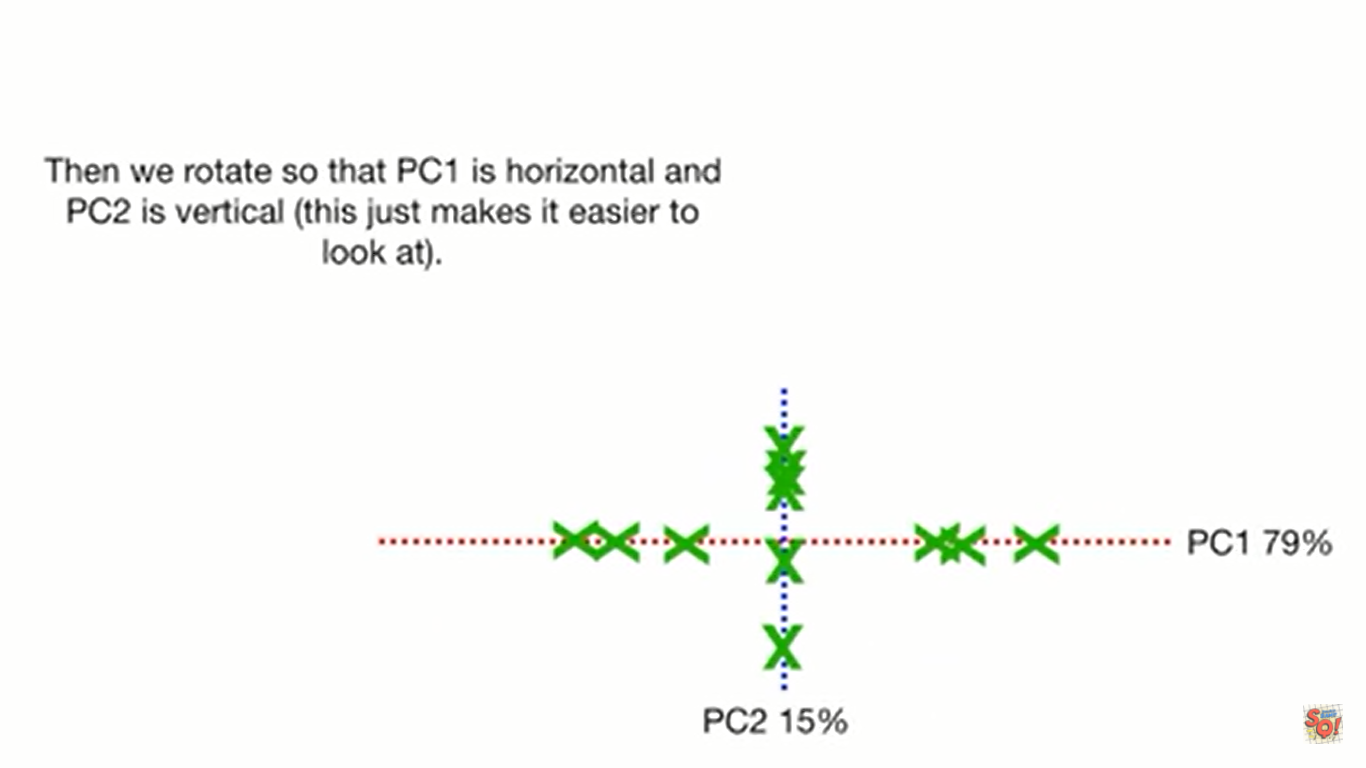

In [13]:
Image('PC1andPC2.png')

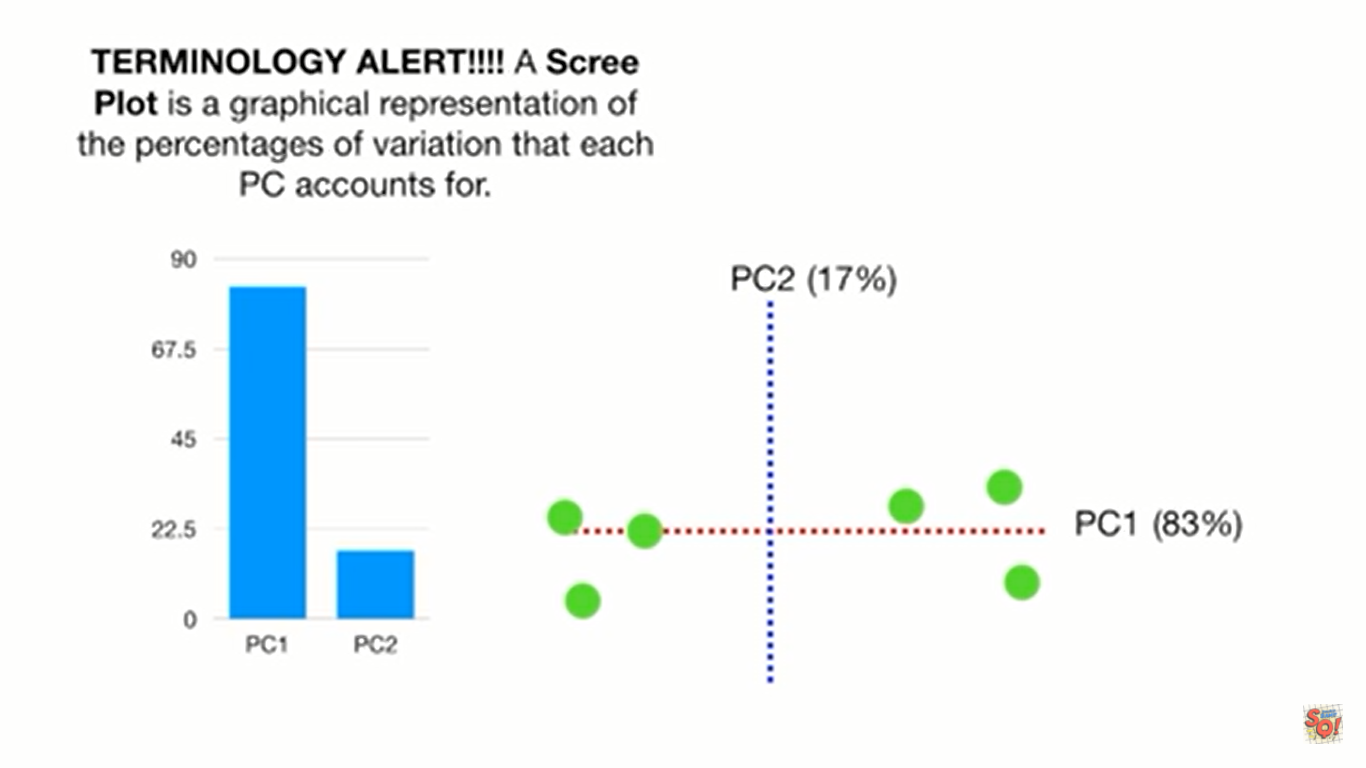

In [15]:
Image('Screeplot.png')
    # Here we can see that PC1 is more effective that PC2

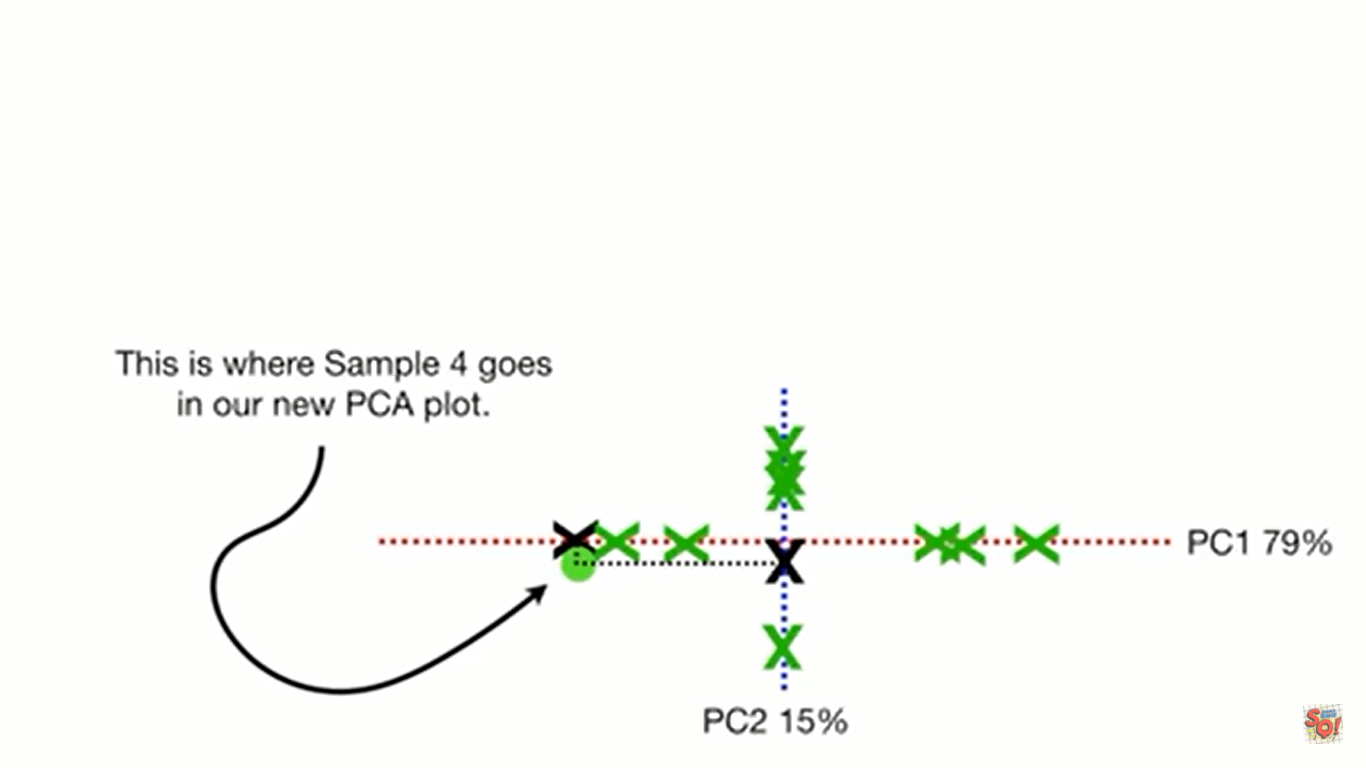

In [14]:
Image('Point.png')

<font color='Blue' size='5px'> Find which component in cancer dataset explains variance<font/>

In [166]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

## Data Set

In [167]:
from sklearn.datasets import load_breast_cancer

In [168]:
cancer=load_breast_cancer()
    # just call the load fn and set as a variable

In [169]:
type(cancer)
    # Like dictionary

sklearn.utils.Bunch

In [170]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [171]:
print(cancer['DESCR'])
    # We use print to make it in a good format
    # Number of Attributes here is 30 and instances is 569 and that is low compared to attributes

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Scaling 
   - Our data needs scaling to converge. If you didn't perform scaling it will take longer to converge due to skinny contour
   - StandardScaler from sklearn
       - The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1
       - It will just fit mean and Std to our data, but won't calculate it
   - Transform
       - It will perfom the calculation on our dat set

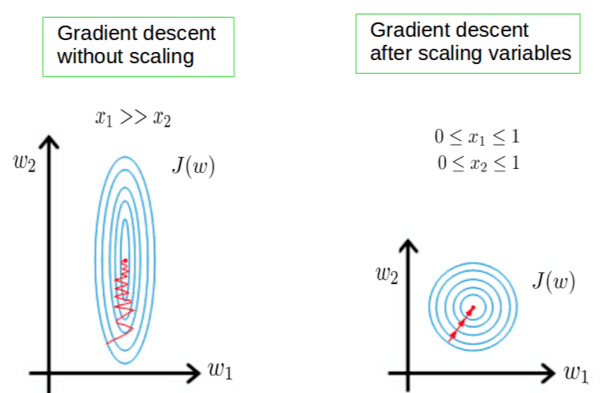

In [92]:
Image('skinny.png')

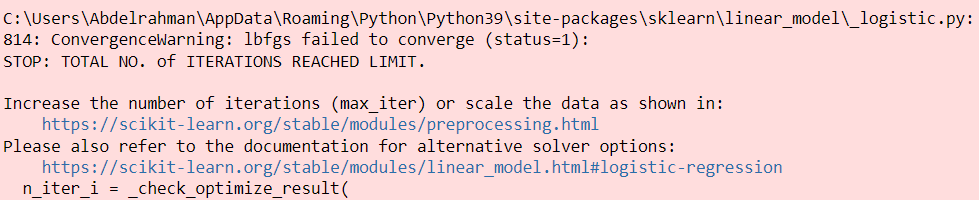

In [121]:
Image('no scaling.PNG')
    # If no scaling

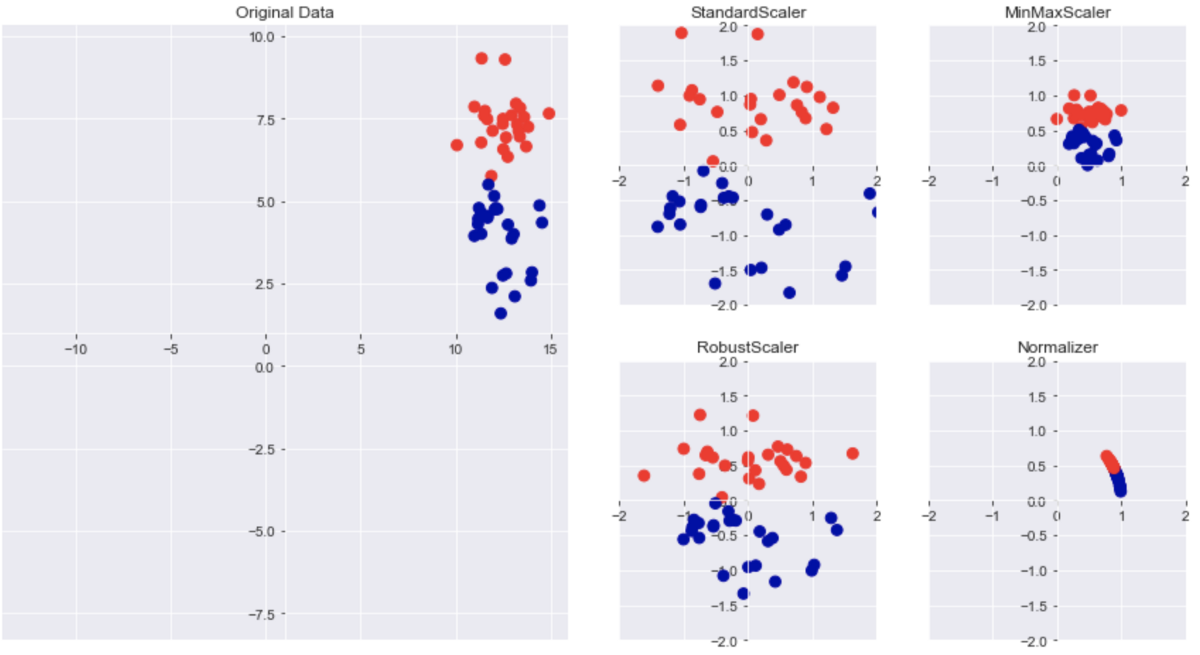

In [93]:
Image('StandardScaler.png')

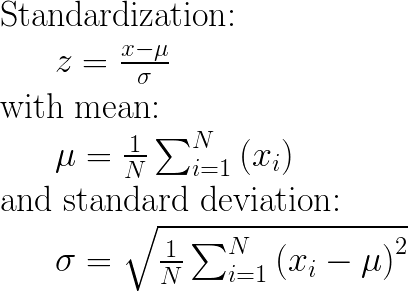

In [172]:
Image('StandardScalerMath.png')

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
scaler=StandardScaler()
    # It will fit mean and std to data, but won't calculate end data
    # Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set.
    # Mean and standard deviation are then stored to be used on later data using :meth:`transform`.


In [175]:
scaler.fit(cancer['data'])

StandardScaler()

In [176]:
scaled_data=scaler.transform(cancer['data'])
    # Perform standardization by centering and scaling

In [177]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [178]:
FeatureD=pd.DataFrame(scaled_data,columns=cancer['feature_names'])

In [179]:
FeatureD.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [180]:
targetD=pd.DataFrame(cancer['target'],columns=['target'])

In [181]:
CancerD=pd.concat([FeatureD,targetD],axis=1)

## PCA (To see which feature is important)

In [182]:
from sklearn.decomposition import PCA
    # Decomposition as you will decompose it to it's principle component
    # The process of making it is similar to standardScaler

In [183]:
pca=PCA(n_components=2)

In [184]:
pca.fit(FeatureD)

PCA(n_components=2)

In [185]:
x_pca=pca.transform(FeatureD)

In [186]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

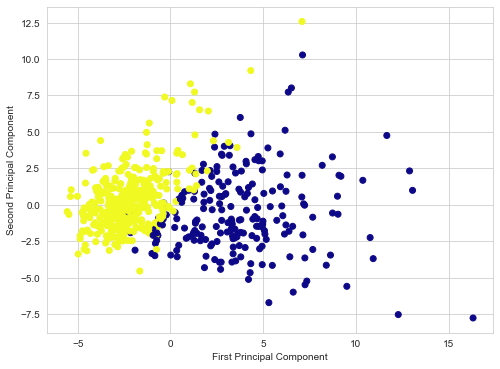

In [187]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

- We can see that by just two component we can see a clear seperation between 0, and 1
- They don't have a meaning on themselvs unfortunatly

In [157]:
pca.components_
    # Each row is an component and columns is the features

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [155]:
df_comp=pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [156]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<AxesSubplot:>

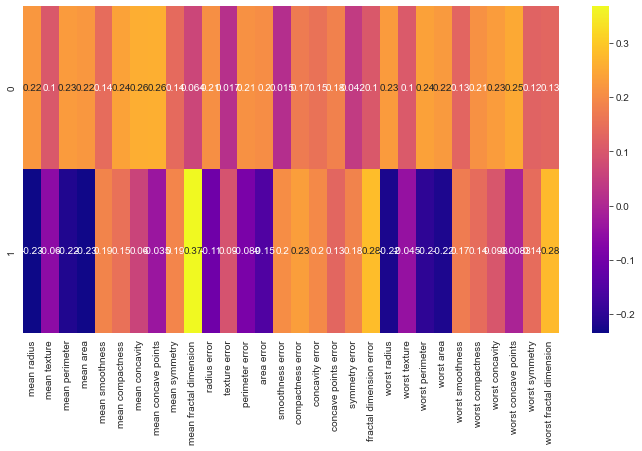

In [160]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',annot=True)

## Preprocessing

In [65]:
from sklearn.model_selection import train_test_split

In [118]:
X=CancerD.drop('target',axis=1)
y=CancerD['target']

In [119]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

## Visualization

## Training

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
Lg=LogisticRegression()

In [126]:
Lg.fit(X_train,y_train)
    # Here we used the data that is not scaled which caused our case to not converge due to skinny conutour

LogisticRegression()

## Prediction

In [127]:
y_pred=Lg.predict(X_test)

In [128]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

## Evaluation

In [129]:
from sklearn.metrics import classification_report,confusion_matrix

In [130]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 63   3]
 [  1 104]]


              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.97      0.99      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



## Using PCA with Logistic Regression

In [161]:
X=x_pca
y=CancerD['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [162]:
Lg2=LogisticRegression()

In [163]:
Lg2.fit(X_train,y_train)

LogisticRegression()

In [164]:
y_pred=Lg2.predict(X_test)

In [165]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 63   3]
 [  5 100]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94        66
           1       0.97      0.95      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

